## Introduction

In this project, we'll aim to find the **two best markets to advertise** our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

Our concerned company offers **monthly subscriptions priced at $59/month**. Organizing surveys is a very good option, but is also very expensive and without a large enough or representative audience, the data collected would not be that useful. `FreeCodeCamp` is a free e-learning platform, we would use the survey data publicily posted [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

The dataset contains responses from 20,000 coders who answered questions like age, demographics, job interests, online resources accessed, education etc.

In [1]:
import pandas as pd
import numpy as np
from numpy import var

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
data.shape

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18175, 136)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [3]:
data.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(data.columns)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

## Interest in Roles Based on Frequency

In [3]:
job_interest = pd.DataFrame((data['JobRoleInterest'].value_counts(normalize=True)*100).round(3)).reset_index()
job_interest.columns = ['Role','Frequency']
job_interest

,Role,Frequency
0,Full-Stack Web Developer,11.771
1,Front-End Web Developer,6.436
2,Data Scientist,2.174
3,Back-End Web Developer,2.031
4,Mobile Developer,1.673
5,Game Developer,1.630
6,Information Security,1.316
7,"Full-Stack Web Developer, Front-End Web Deve...",0.915
8,"Front-End Web Developer, Full-Stack Web Deve...",0.801
9,Product Manager,0.787


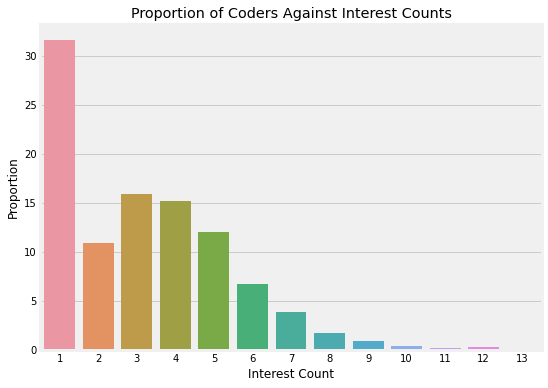

In [17]:
role_interest_counts = data['JobRoleInterest'].dropna().apply(lambda x : len(x.split(',')))
role_interest_proportion_sorted = pd.DataFrame((role_interest_counts.value_counts(normalize=True)*100).sort_index()).reset_index() 
role_interest_proportion_sorted.columns = ['Interest Count','Proportion']

plt.figure(figsize=(8,6))
plt.title('Proportion of Coders Against Interest Counts')
sns.barplot(x='Interest Count', y='Proportion', data=role_interest_proportion_sorted)

### Observations
- Job interests vary from game/web/mobile developer, user experience, product, data, security, software roles.
- People (~69%) seem to be interested in more than role as well
- Quite a lot of them seem to be interested in "web/mobile developer" roles

Text(0.5, 1.0, 'Proportion of Coders Interested in Mobile & Web Development')

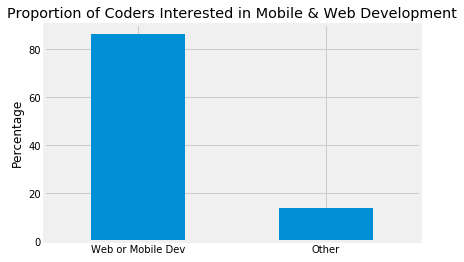

In [5]:
web_or_mobile = data['JobRoleInterest'].dropna().str.contains('(?i)web|mobile')
web_or_mobile_counts = (web_or_mobile.value_counts(normalize=True)*100).round(3)

web_or_mobile_counts.plot.bar()
plt.ylabel('Percentage')
plt.xticks([0,1],['Web or Mobile Dev','Other'], rotation=0)
plt.title('Proportion of Coders Interested in Mobile & Web Development')

## New Coders - Locations

In [19]:
data_with_interest = data[~data['JobRoleInterest'].isnull()]
data_with_interest.shape

(6992, 136)

In [20]:
country_freq = data_with_interest['CountryLive'].value_counts()
country_perc = data_with_interest['CountryLive'].value_counts(normalize=True)*100

customers_by_country = pd.DataFrame({'Frequency':country_freq,'Percentage':country_perc.round(3)})
customers_by_country

,Frequency,Percentage
United States of America,3125,45.700
India,528,7.722
United Kingdom,315,4.607
Canada,260,3.802
Poland,131,1.916
...,...,...
Bolivia,1,0.015
Angola,1,0.015
Jordan,1,0.015
Yemen,1,0.015


By observing the above table, `United States of America` captures **45.7% of the marke**t, followed by `India` (7.7%) and then `United Kingdom` (4.6%). There seems to be a big gap in the markets amongst the first and remaining countries.

Even if US has a large market share, there could be many customers, or coders that tend to rely on free courses and opt out for paid subscriptions and plans for online courses. This could make it a non-profitable country even with such a big presence. 

### Top Markets
The next logical step is to find out how much money are customers spending in these markets. How many potential customers can be converted to purhcase online courses? Sometimes a higher conversion rate on a smaller market share can be more beneficial than the other way round. What is the amount of money coders are willing to shell out for online courses in these markets?


In [21]:
# Selecting top 4 countries for analysis
top_markets_countries = customers_by_country.index[:4]
print(top_markets_countries)

# Compute monthly expenditure
top_markets = data_with_interest[data_with_interest['CountryLive'].isin(top_markets_countries)]
top_markets['MonthsProgramming'].replace(0,1, inplace=True)
top_markets['MonthlySpend'] = top_markets['MoneyForLearning'] / top_markets['MonthsProgramming']
top_markets.shape

Index(['United States of America', 'India', 'United Kingdom', 'Canada'], dtype='object')


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(4228, 137)

In [22]:
original_row_count = top_markets.shape[0]
top_markets.dropna(subset=['MonthlySpend'], inplace=True)

print('{} rows of null values removed'.format(original_row_count - top_markets.shape[0]))
top_markets.shape

313 rows of null values removed


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(3915, 137)

In [23]:
top_markets['MonthlySpend'].describe()

count     3915.000000
mean       196.990196
std       1701.091730
min          0.000000
25%          0.000000
50%          2.000000
75%         40.000000
max      80000.000000
Name: MonthlySpend, dtype: float64

## Monthly Spend Across Different Markets

In [38]:
top_markets.groupby('CountryLive').describe()['MonthlySpend']

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.0
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.0
United States of America,2933.0,227.997996,1940.245614,0.0,0.0,3.333333,50.000000,80000.0


As the population of coders reduces the mean `MonthlySpend` also goes down except for `United Kingdom`. There are also aleast 50% of coders who spend **$0/month** for all countries except United States of America (by observing the median).  

Given that Canada and United Kingdom have better GDP per capita, the values seem low. This could be due to not full representative enough data and a case of outliers, like wrong survey answers.

Text(0.5, 0, 'Country')

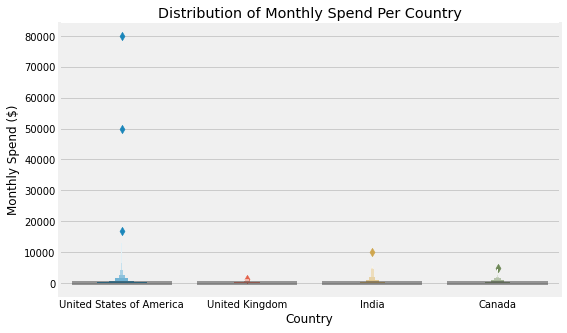

In [39]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='CountryLive', y='MonthlySpend', data=top_markets)
plt.title('Distribution of Monthly Spend Per Country')
plt.ylabel('Monthly Spend ($)')
plt.xlabel('Country')

We are already aware that at minimum around 50% of coders spend nothing. Looking at the above graph, we can can immediately see outliers for United States. Let's trim out coders who spend more than $20,000/month and re-plot.

In [40]:
top_markets = top_markets[top_markets['MonthlySpend'] < 20000]
top_markets.shape

(3913, 137)

In [41]:
top_markets.groupby('CountryLive').describe()['MonthlySpend']

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.000000
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.000000
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.000000
United States of America,2931.0,183.800110,864.767219,0.0,0.0,3.333333,50.000000,16666.666667


Text(0.5, 0, 'Country')

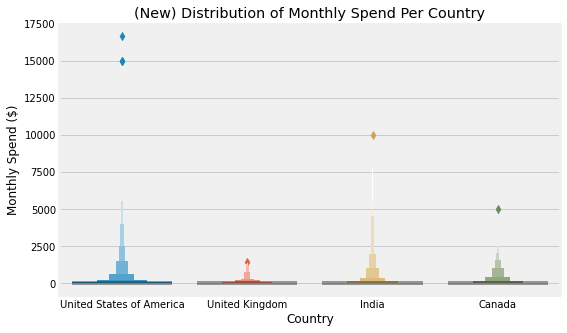

In [42]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='CountryLive', y='MonthlySpend', data=top_markets)
plt.title('(New) Distribution of Monthly Spend Per Country')
plt.ylabel('Monthly Spend ($)')
plt.xlabel('Country')

## Indian Market Outliers

In [43]:
india_market = top_markets[top_markets['CountryLive'] == 'India']
india_market['MonthlySpend'].describe(percentiles=[.25,.5,.75,.8,.9])

count      463.000000
mean       135.100982
std        692.960378
min          0.000000
25%          0.000000
50%          0.000000
75%         13.250000
80%         29.711111
90%        163.333333
max      10000.000000
Name: MonthlySpend, dtype: float64

In [44]:
india_market[india_market['MonthlySpend'] > 1000]['MonthlySpend']

1728      5000.000000
1755      3333.333333
6350      1500.000000
6913      1666.666667
7989      5000.000000
8126      5000.000000
9410      2000.000000
12435     1250.000000
12451     2000.000000
13398    10000.000000
15587     4166.666667
Name: MonthlySpend, dtype: float64

In [45]:
india_extremes = india_market[india_market['MonthlySpend'] >= 5000]
india_extremes

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.0
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0


None of the Indian coders that spent large sums of money seem to have attended a bootcamp, such high expenses defintely seem to be outliers.

In [46]:
india_extremes_outliers = india_extremes.index

## US Market Outliers

In [47]:
us_extremes = top_markets[(top_markets['CountryLive'] == 'United States of America') & (top_markets['MonthlySpend'] >= 5000)]
us_extremes

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3145,34.0,1.0,0.0,0.0,Hackbright Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5666.666667
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
5769,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
6528,37.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667


In [48]:
us_extremes['AttendedBootcamp'].value_counts()

1.0    11
0.0     7
Name: AttendedBootcamp, dtype: int64

In [49]:
us_extremes[['MonthsProgramming','MonthlySpend','AttendedBootcamp']]

,MonthsProgramming,MonthlySpend,AttendedBootcamp
718,1.0,8000.000000,1.0
1222,2.0,6500.000000,1.0
3145,3.0,5666.666667,1.0
3184,1.0,9000.000000,1.0
3930,6.0,10833.333333,0.0
5769,3.0,5000.000000,0.0
6528,1.0,5000.000000,0.0
6805,1.0,15000.000000,1.0
7198,5.0,14000.000000,0.0
7505,3.0,6666.666667,1.0


Coders who did not attend bootcamps and still spent such large amounts of money could be treated as outliers. Also, those who have high monthly means but at the time of the survey completed only 3 months or less of coding should also be removed.

In [50]:
# Remove coders that have not attended a bootcamp OR have less than 4 months of programming experience from US extremes
cond1 = (us_extremes['AttendedBootcamp'] == 0)
cond2 = (us_extremes['MonthsProgramming'] <= 3)
us_extremes_outliers = us_extremes[cond1 | cond2].index
us_extremes_outliers

Int64Index([  718,  1222,  3145,  3184,  3930,  5769,  6528,  6805,  7198,
             7505,  8202,  8901,  9778, 13145, 16211, 16650, 16997, 17231],
           dtype='int64')

In [51]:
print(top_markets.shape)
top_markets.drop(india_extremes_outliers, inplace=True)
top_markets.drop(us_extremes_outliers, inplace=True)
print(top_markets.shape)

(3913, 137)
(3891, 137)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Removing More Outliers

In [52]:
top_markets['MonthlySpend'].describe()

count    3891.000000
mean      117.720368
std       415.123604
min         0.000000
25%         0.000000
50%         1.666667
75%        34.833333
max      5000.000000
Name: MonthlySpend, dtype: float64

In [53]:
top_markets[top_markets['MonthlySpend'] >= 3000].shape

(23, 137)

In [54]:
top_markets[top_markets['MonthlySpend'] >= 3000]['AttendedBootcamp'].value_counts()

1.0    12
0.0    11
Name: AttendedBootcamp, dtype: int64

Even after removing extreme outliers, the distribution of `MonthlySpend` has its mean at 118 and standard deviation of 415. With only 23 data points having a monthly spend of $3,000 or more, we can apply our pre-defined conditions on this subset to remove more outliers.

In [55]:
cond0 = (top_markets['MonthlySpend'] >= 3000)
cond1 = (top_markets['AttendedBootcamp'] == 0)
cond2 = (top_markets['MonthsProgramming'] <= 3)

other_outliers = top_markets[cond0 & (cond1 | cond2)].index
print(f'{len(other_outliers)} outlier(s) additionally removed')
top_markets.drop(other_outliers, inplace=True)

14 outlier(s) additionally removed


## Re-Computing Monthly Means

In [57]:
top_markets.groupby('CountryLive').describe()['MonthlySpend']

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,239.0,93.065400,307.512802,0.0,0.0,0.0,25.000000,2337.166667
India,457.0,65.758763,233.452738,0.0,0.0,0.0,12.500000,2000.000000
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.0,20.416667,1400.000000
United States of America,2902.0,116.701627,375.203681,0.0,0.0,3.0,43.750000,4000.000000


Text(0.5, 0, 'Country')

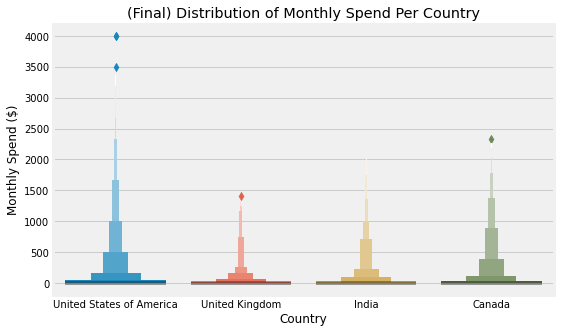

In [58]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='CountryLive', y='MonthlySpend', data=top_markets)
plt.title('(Final) Distribution of Monthly Spend Per Country')
plt.ylabel('Monthly Spend ($)')
plt.xlabel('Country')

In [60]:
top_markets.groupby('CountryLive').mean()['MonthlySpend']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    116.701627
Name: MonthlySpend, dtype: float64

# Choosing the Best Markets

In [78]:
coders_to_markets = top_markets['CountryLive'].value_counts(normalize=True)*100
coders_to_markets

United States of America    74.851689
India                       11.787465
United Kingdom               7.196286
Canada                       6.164560
Name: CountryLive, dtype: float64

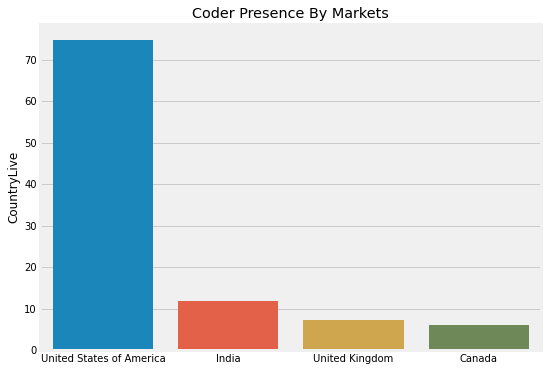

In [83]:
plt.figure(figsize=(8,6))
plt.title("Coder Presence By Markets")
sns.barplot(x=coders_to_markets.index, y=coders_to_markets)

In [67]:
top_markets['Spend'] = np.where(top_markets['MonthlySpend'] == 0, 'No Spend', 'Spend')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
us_spend_counts = (top_markets[top_markets['CountryLive'] == 'United States of America']['Spend'].value_counts(normalize=True)*100).sort_index()
us_spend_counts

No Spend    45.279118
Spend       54.720882
Name: Spend, dtype: float64

In [85]:
india_spend_counts = top_markets[top_markets['CountryLive'] == 'India']['Spend'].value_counts(normalize=True)*100
india_spend_counts

No Spend    57.330416
Spend       42.669584
Name: Spend, dtype: float64

In [86]:
canda_spend_counts = top_markets[top_markets['CountryLive'] == 'Canada']['Spend'].value_counts(normalize=True)*100
canda_spend_counts

No Spend    52.719665
Spend       47.280335
Name: Spend, dtype: float64

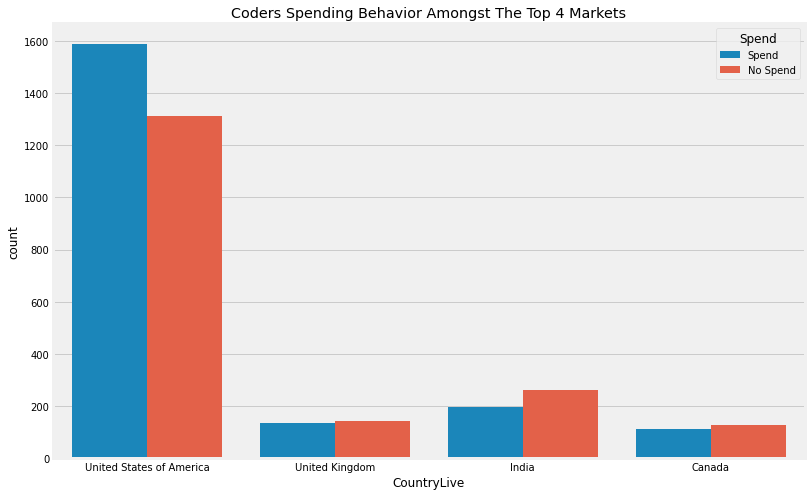

In [71]:
plt.figure(figsize=(12,8))
plt.title('Coders Spending Behavior Amongst The Top 4 Markets')
sns.countplot(x='CountryLive',hue='Spend', data=top_markets)

In [74]:
spenders = top_markets[top_markets['Spend'] == 'Spend']
spenders.groupby('CountryLive').describe()['MonthlySpend']

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,113.0,196.837439,424.664765,0.416667,8.333333,25.000000,125.000000,2337.166667
India,195.0,154.111562,338.256033,0.138889,5.196429,20.000000,122.500000,2000.000000
United Kingdom,137.0,92.730727,222.359671,0.050000,8.333333,20.833333,66.666667,1400.000000
United States of America,1588.0,213.267079,486.550532,0.033333,10.000000,33.333333,150.000000,4000.000000


In [87]:
top_markets.groupby('CountryLive').describe()['MonthlySpend']

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,239.0,93.065400,307.512802,0.0,0.0,0.0,25.000000,2337.166667
India,457.0,65.758763,233.452738,0.0,0.0,0.0,12.500000,2000.000000
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.0,20.416667,1400.000000
United States of America,2902.0,116.701627,375.203681,0.0,0.0,3.0,43.750000,4000.000000


`United States` is a strong guarantee as a profitable market:
    - majority (75%) of new coders based here.
    - Highest spending behavior on online courses.
    - Majority of coders (54%) spend dollars to access online coursesa. 
    
The `United Kingdom market` is worst suited to enter with current conditions as people spend the least and below our company's prices ($59/month plan).

Both `India` and `Canada` seem to be exciting places to invest as the second market. `Canada` shows a **stronger purchasing power** by the coders but has 50\% less customers than India. The number of coders in India gives some confidence as there are larger possibilites to attract, retain and increase the spending power of potential customers. As of now coders in India are spending $66/month vs $93/month in Canada.

There could finally be 3 solutions that can be addressed to the marketing team :
    1. United States & Canada
    2. United States & India
    3. United States, India, Canada

There should be more budget **(60-70\%)** prioritzed for the United States market as it's a low risk market. India should be second **(30-40\%)** in the order due to more potential customers, the risk is lower and the monthly spend is still favorable. At third place **(10-20\%)**, the Canadian market should be researched more, maybe all the customers willing to pay are interested in certain high ROI courses which are inherently costly to purchase? 